# ___

# [ Machine Learning in Geosciences ]

**Department of Applied Geoinformatics and Carthography, Charles University** 

*Lukas Brodsky lukas.brodsky@natur.cuni.cz*

    
___

# Multilayer Neural Network 

The purpose of this notebook is to demosnstrate the multilayer neural network in PytTorch framework. 

Tasks: 

* Model 1: 1 input, 2 hidden layers, 1 output using `nn.Sequential()` 

* Model 2: with internal structure: (1, 16), (16, 32), (32, 32), (32, 32), (32, 16), (16, 1)

* Model 3: with 1 input, 1 nn.ModuleList() for variable hidden layers and 1 outpout using PyTorch `nn.Sequential()`, and `nn.ModuleList()`. 

In [1]:
import numpy as np
import torch
from torch import nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [2]:
# Data
num_points = 1000 
torch.manual_seed(0)
x = torch.rand(num_points, 1)
x, indices  = torch.sort(x, 0)
noise = torch.rand_like(x) * .7
y = .5 * (x*6).sin() + x + (x - .75) * noise

In [3]:
print(x.shape)
print(y.shape)

torch.Size([1000, 1])
torch.Size([1000, 1])


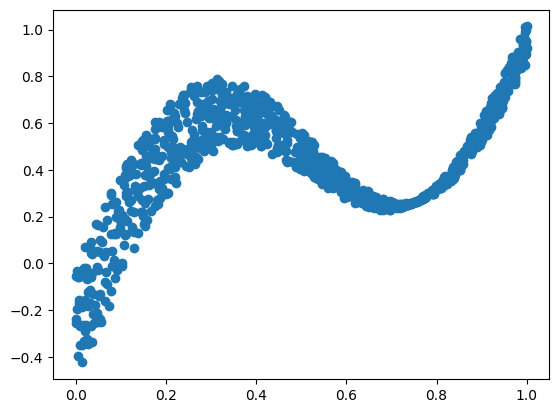

In [4]:
plt.scatter(x, y)
plt.show()

# noise is decreasing with increasing x value

### Design the ANN model 1

The Artificial Neuaral Network based on initialized `nn_block` using PyTorch `nn.Sequential()` 

* input features: 1 
* output (regression): 1 

* Internl structure of the ANN: 
    * input layer: nn.Linear(num_features, 16)
    * hidden layer #1: nn.Linear(16, 32)
    * hidden layer #2: nn.Linear(32, 16) 
    * output layer: nn.Linear(16, num_features)

    * activation: nn.ReLU() 
    
Hence: 

    self.nn_block = nn.Sequential(
            nn.Linear(num_features, 16),  # input layer
            nn.ReLU(),                    # non-inearity 
            ... 
            ) 

The definition of the `forward()` method is then simply: 

    def forward(self, inputs):
        x = self.nn_block(inputs)
        
        return (x)


In [15]:
# Nonlinear model with two hidden layers 
class NonLinear_1(nn.Module):
    def __init__(self, num_features):
        super(NonLinear_1, self).__init__()
        
        self.nn_block = nn.Sequential(nn.Linear(num_features, 16),
                                      nn.ReLU(),
                                      nn.Linear(16,32),
                                      nn.ReLU(),
                                      nn.Linear(32,16),
                                      nn.ReLU(),
                                      nn.Linear(16, num_features))

    def forward(self, inputs):
        x = self.nn_block(inputs)
        
        return (x)

In [20]:
# Nonlinear model with two hidden layers 
class NonLinear_2(nn.Module):
    def __init__(self, num_features):
        super(NonLinear_2, self).__init__()
        
        self.nn_block = nn.Sequential(nn.Linear(num_features, 16),
                                      nn.ReLU(),
                                      nn.Linear(16,16),
                                      nn.ReLU(),
                                      nn.Linear(16,1),
                                      nn.ReLU())

    def forward(self, inputs):
        x = self.nn_block(inputs)
        
        return (x)

In [22]:
m = NonLinear_2(1)
m

NonLinear_2(
  (nn_block): Sequential(
    (0): Linear(in_features=1, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=1, bias=True)
    (5): ReLU()
  )
)

### Design the ANN model 2 

The Artificial Neuaral Network based on initialized `nn_block` using PyTorch `nn.Sequential()` 

* input features: 1 
* output (regression): 1 

* Internl structure of the ANN: (1, 16), (16, 32), (32, 32), (32, 32), (32, 16), (16, 1)
* activation: nn.ReLU() 
    

In [26]:
# Nonlinear model with four hidden layers 
class NonLinear_3(nn.Module):
    def __init__(self, num_features):
        super(NonLinear_3, self).__init__()
        
        self.nn_block = nn.Sequential(nn.Linear(num_features, 16),
                                      nn.ReLU(),
                                      nn.Linear(16,32),
                                      nn.ReLU(),
                                      nn.Linear(32,32),
                                      nn.ReLU(),
                                      nn.Linear(32,32),
                                      nn.ReLU(),
                                      nn.Linear(32,16),
                                      nn.ReLU(),
                                      nn.Linear(16, num_features))

    def forward(self, inputs):
        x = self.nn_block(inputs) 
        
        return (x)

### Design the ANN model 3

The Artificial Neuaral Network based on initialized nn blocks (1 input, 1 nn.ModuleList() for variable hidden layers and one outpout) using PyTorch `nn.Sequential()`, and `nn.ModuleList()`. 

* input features: 1 
* output (regression): 1 

* Internl structure of the ANN: 
    * input layer (1, 32), 
    * N hidden layers based model initialization with dimensionality (32, 32)
    * output layer (32, 1)
    * activation: nn.ReLU() 

Use `nn.ModuleList()`: 

        self.num_hidden_layers = num_hidden_layers 
        self.hidden_layer_list = []
        self.hidden_layer = nn.Sequential(nn.Linear(32, 32), 
                                  nn.ReLU()
                                 )     
        for i in range(num_hidden_layers):
            self.hidden_layer_list.append(self.hidden_layer)

    
        self.hidden_layers = nn.ModuleList(self.hidden_layer_list)        

And then in `forward()` method you have to loop over N hidden layers: 

        for i in range(len(self.hidden_layers)):
            x = self.hidden_layers[i](x) 


In [45]:
# Nonlinear model with two hidden layers 
class NonLinear_4(nn.Module):
    def __init__(self, num_features, num_hidden_layers):
        super(NonLinear_4, self).__init__()
        
        self.nn_input = nn.Sequential(nn.Linear(num_features, 32),
                                      nn.ReLU())
        
        self.num_hidden_layers = num_hidden_layers 
        self.hidden_layer_list = []
        self.hidden_layer = nn.Sequential(nn.Linear(32, 32), 
                                  nn.ReLU()
                                 )     
        for i in range(num_hidden_layers):
            self.hidden_layer_list.append(self.hidden_layer)
    
        self.hidden_layers = nn.ModuleList(self.hidden_layer_list)        
        

        self.nn_output = nn.Sequential(nn.Linear(32,1))

    def forward(self, inputs):
        x = self.nn_input(inputs)

        for i in range(len(self.hidden_layers)):
            x = self.hidden_layers[i](x) 
        
        x = self.nn_output(x)
    
        return (x)

In [ ]:
# Nonlinear model with two hidden layers 
class NonLinear(nn.Module):
    def __init__(self, num_features, num_hidden_layers):
        super(NonLinear, self).__init__()
        
        self.nn_input = pass
    
        self.hidden_layers = nn.ModuleList(pass)        
        

        self.nn_output = pass

    def forward(self, inputs):
        pass 
    
        return (x)

In [49]:
# instantiate the model
model = NonLinear_4(1,3)
model

NonLinear_4(
  (nn_input): Sequential(
    (0): Linear(in_features=1, out_features=32, bias=True)
    (1): ReLU()
  )
  (hidden_layer): Sequential(
    (0): Linear(in_features=32, out_features=32, bias=True)
    (1): ReLU()
  )
  (hidden_layers): ModuleList(
    (0-2): 3 x Sequential(
      (0): Linear(in_features=32, out_features=32, bias=True)
      (1): ReLU()
    )
  )
  (nn_output): Sequential(
    (0): Linear(in_features=32, out_features=1, bias=True)
  )
)

In [50]:
# optimization 
learning_rate = 0.1
epoches = 3000

# loss: regression -> MSE
criterion = nn.MSELoss()

# optimizer: stochastic gradient descent 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

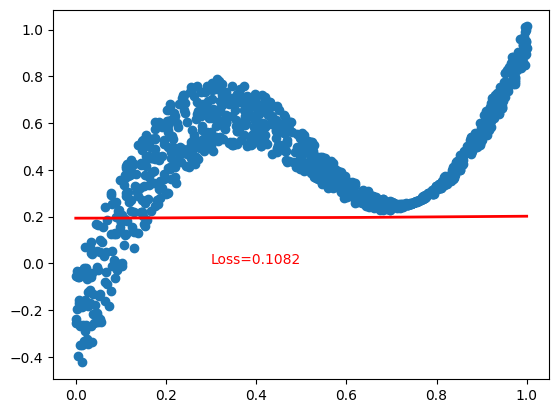

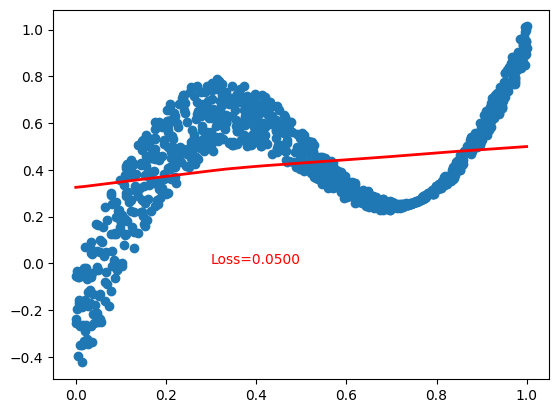

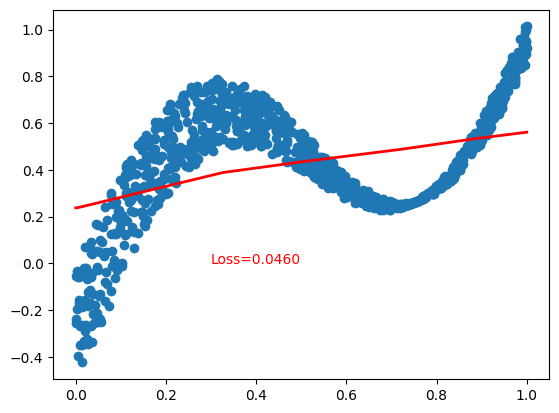

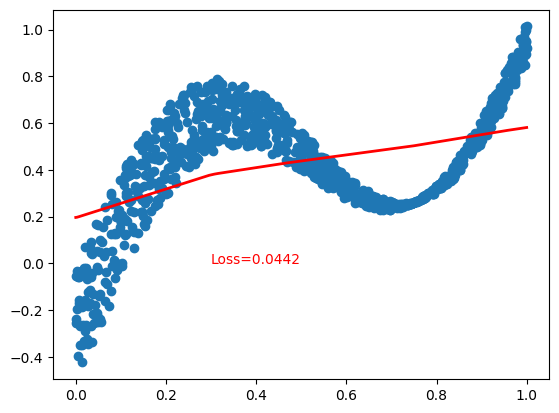

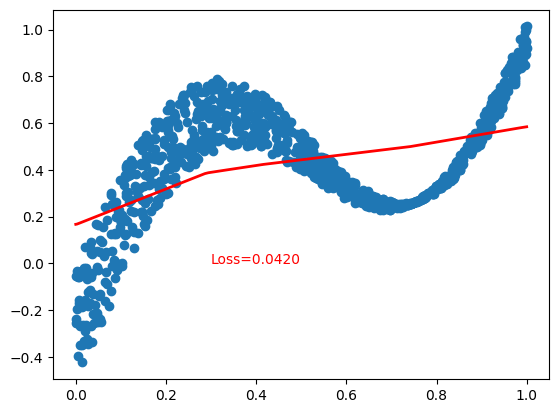

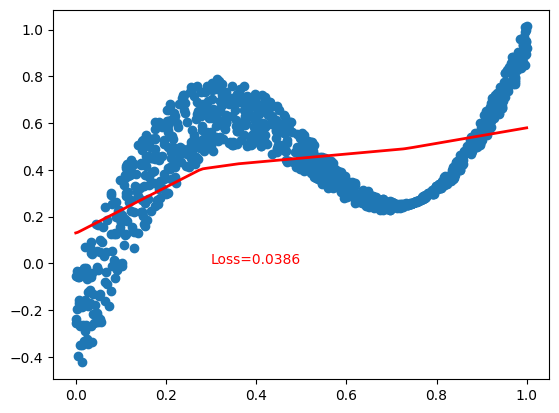

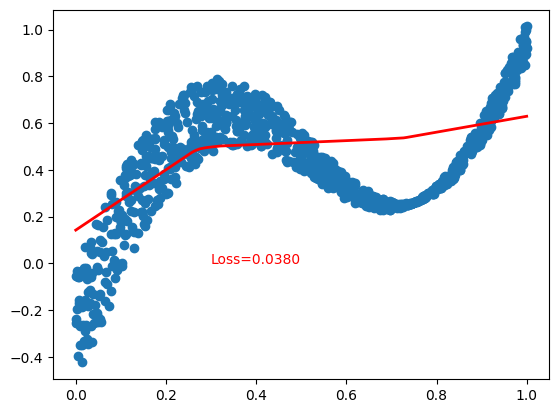

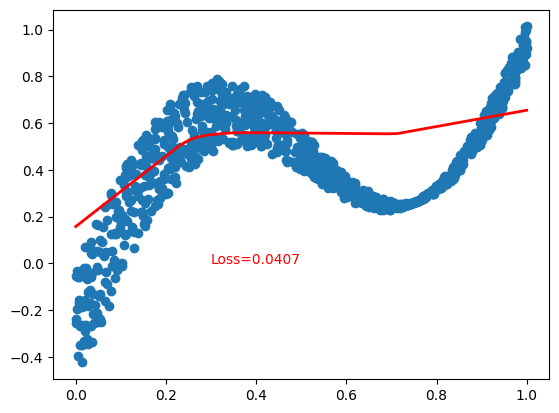

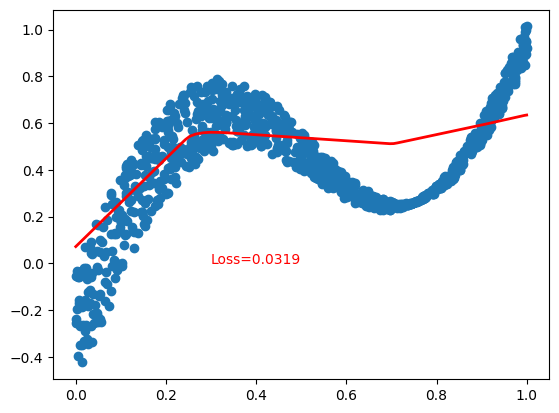

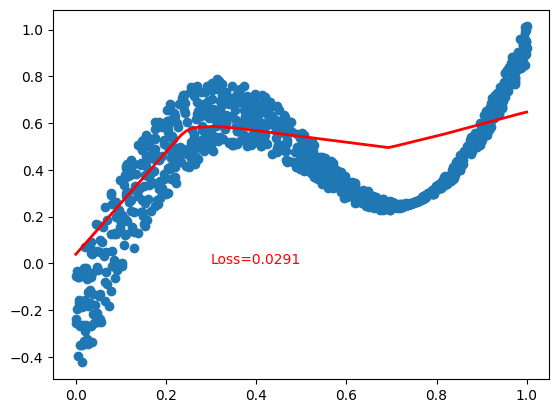

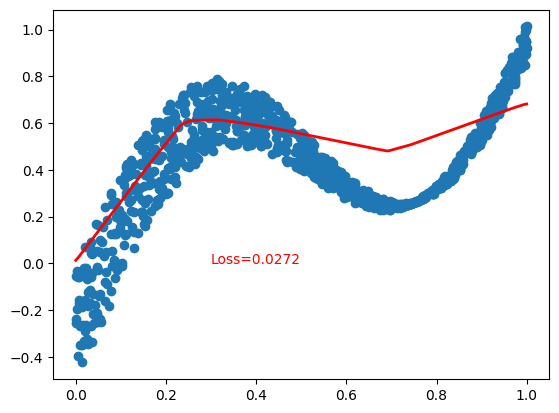

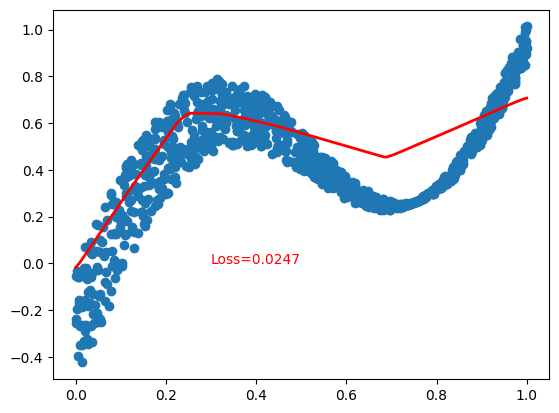

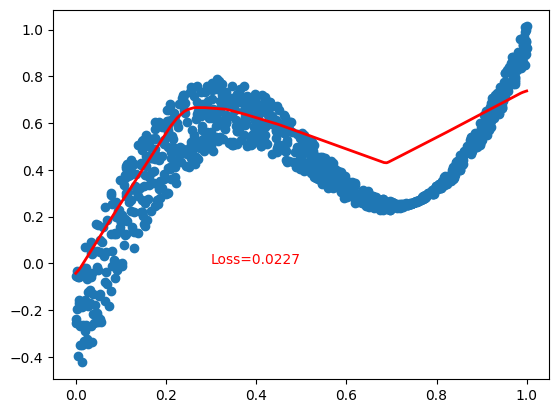

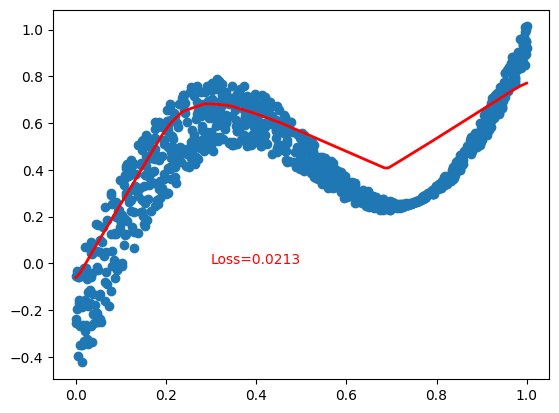

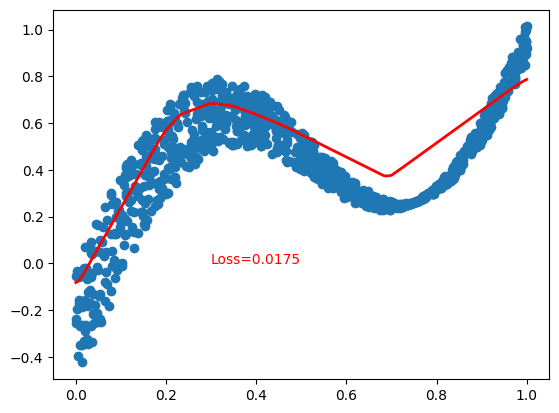

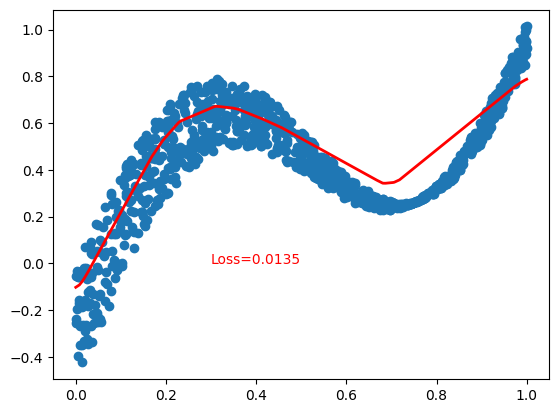

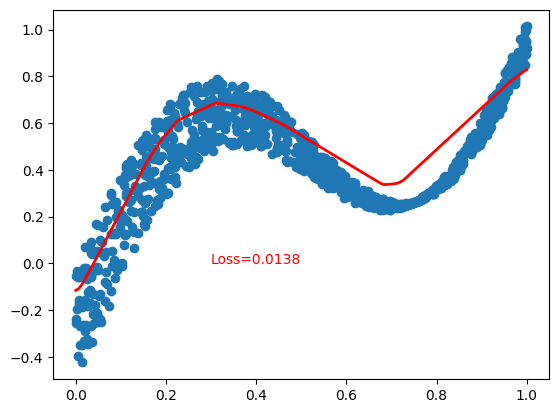

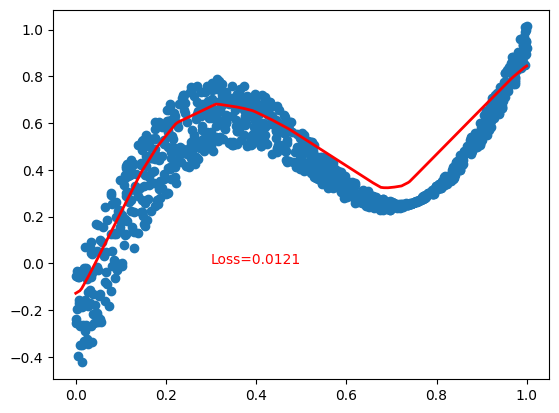

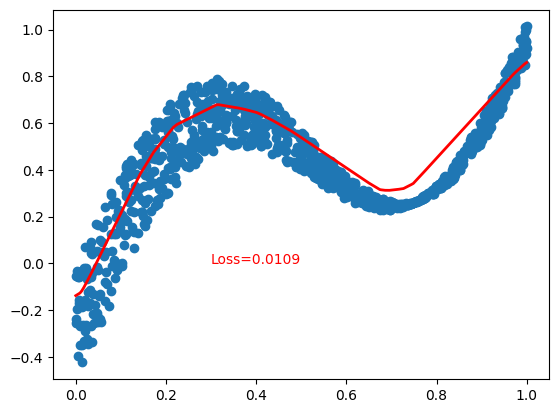

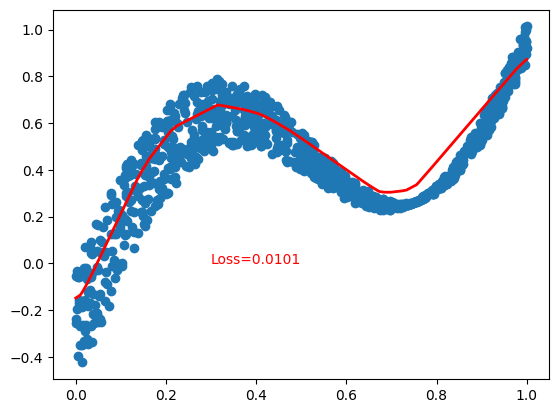

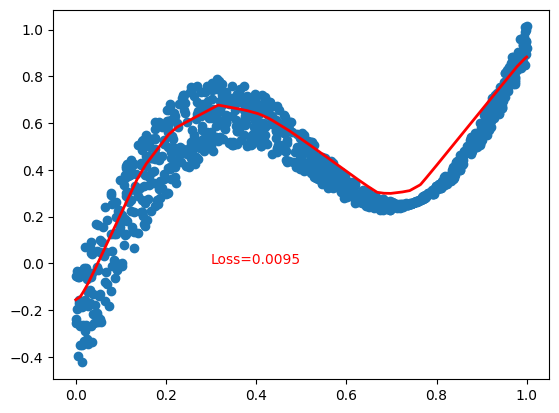

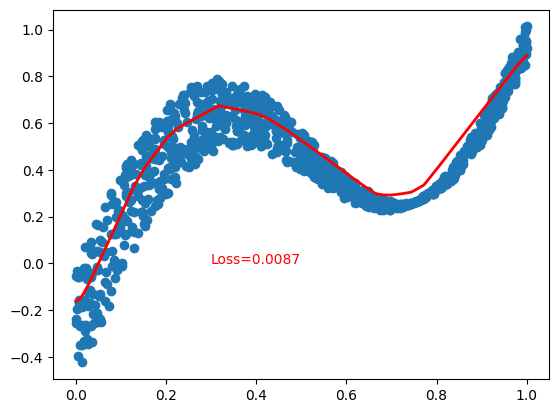

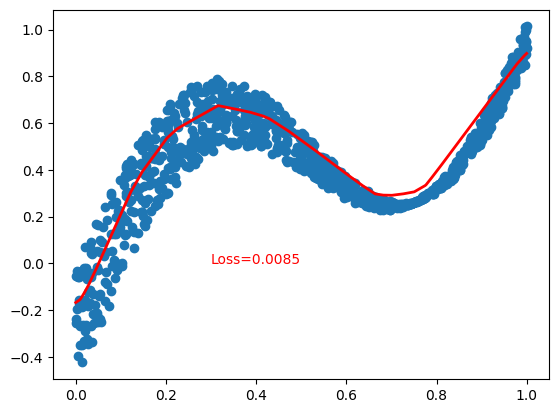

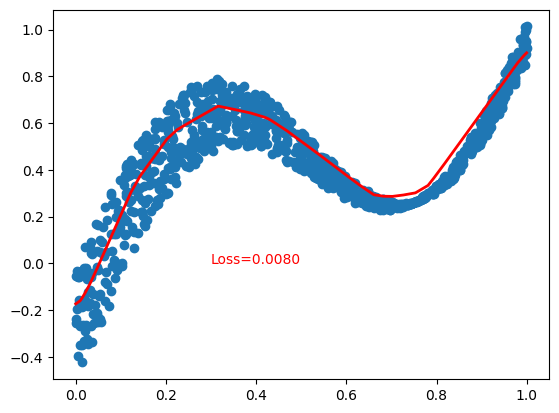

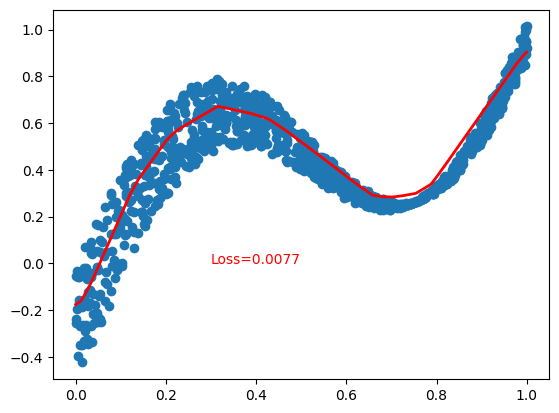

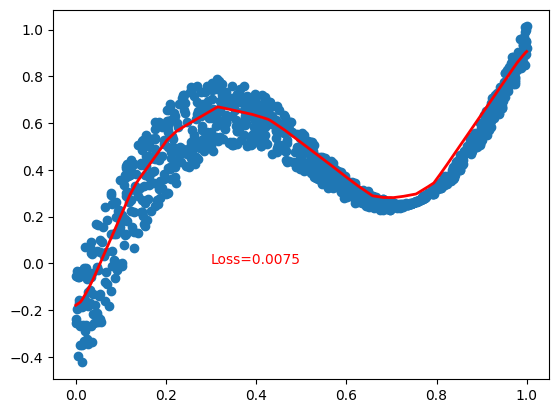

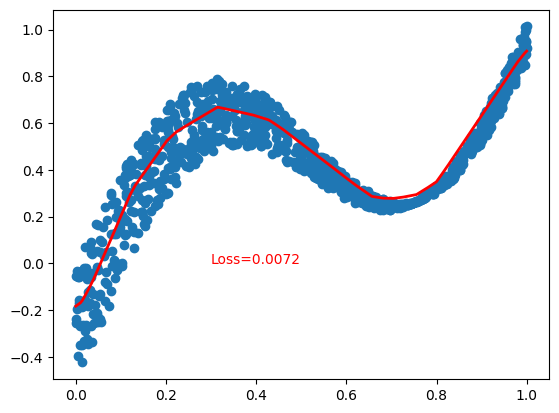

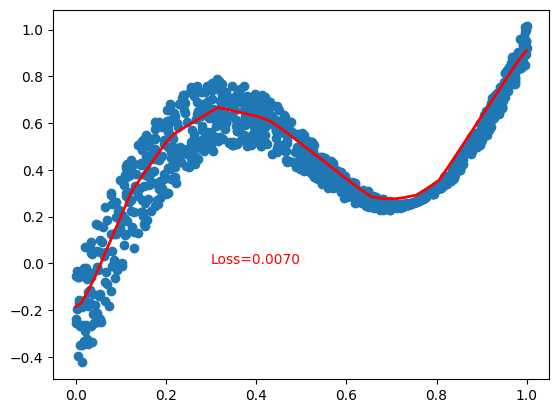

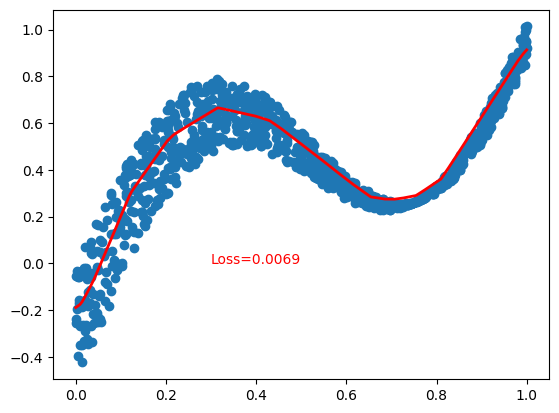

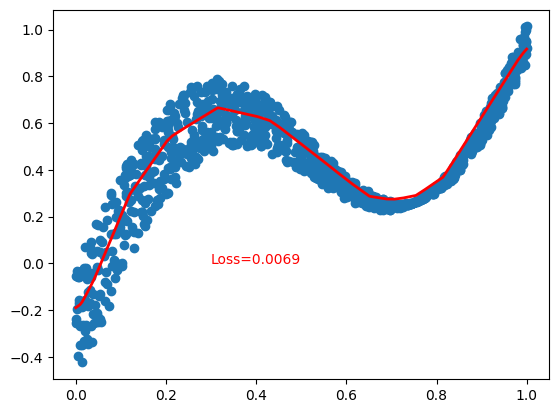

In [51]:
# tarining
inputs = Variable(x)
outputs = Variable(y)

for i in range(epoches):
    # apply model
    prediction = model(inputs)
    # get loss 
    loss = criterion(prediction,y)
    # remove gradiens from optimizaer previous step with .zero_grad()
    optimizer.zero_grad() 
    # backpropagation on loss 
    loss.backward() 
    # optimization .step()
    optimizer.step() 

    # plot model result with loss 
    if i % 100 == 0:
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=2)
        plt.text(0.3, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 10, 'color':  'red'})
        plt.pause(0.01)

plt.show()

### Finetune the ANN model for N variable hidden layers 

In [ ]:
pass 